# K- means

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [ ]:
X, y = make_blobs(n_samples=1000,
                  n_features=2,
                  cluster_std=1.6,
                  centers=3)

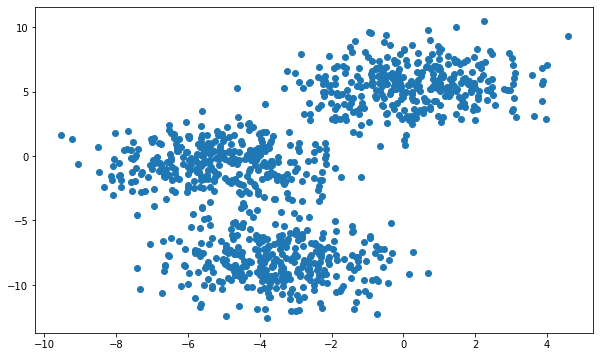

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.scatter(X[:, 0], X[:, 1])

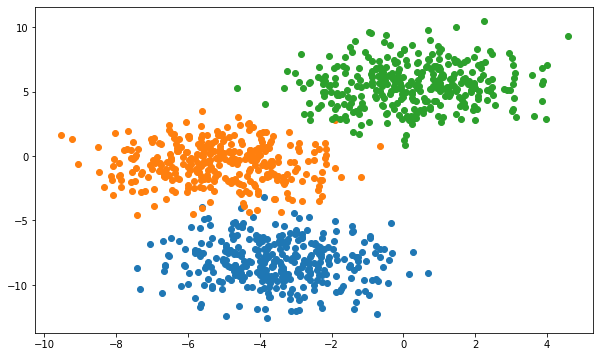

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
for i in np.unique(y):
  ax.scatter(X[:,0][y==i],X[:, 1][y==i])

## Algoritmo:

1. Establecer $k$ centroides de manera aleatoria.
2. Calcular las distancias de los puntos a cada uno de los centroides.
3. Encontrar la distancia mínima de un punto a un centroide específico.
4. Asignar el punto al centroide.
5. Repetir de 2 a 4 hasta que converja.

In [ ]:
# establecer k centroides de manera aleatoria
k = 3
centroides = {}
for i in range(k):
  centroides[i] = X[np.random.choice(len(X))]
centroides

{0: array([-4.48785818, -7.46536858]),
 1: array([-4.69163927, -9.19148115]),
 2: array([1.01838372, 6.06856461])}

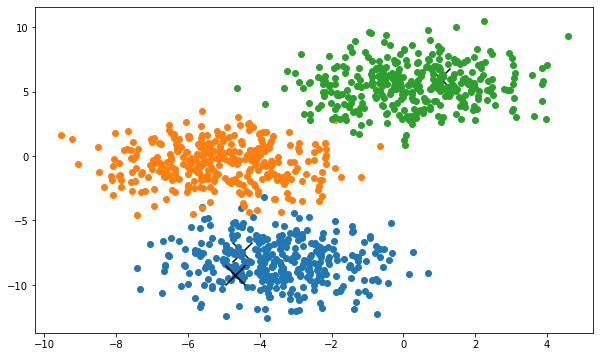

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
for pos, centroide in centroides.items():
  ax.scatter(centroide[0], centroide[1], marker='x', s=400, color='k')
  ax.scatter(X[:, 0][y==pos], X[:, 1][y==pos])


$$dist(\textbf{p}, \textbf{q})=\sqrt{(p_1-q_1)^2+(p_0-q_0)^2}$$

In [ ]:
# calcular las distancias

def dist_euclidiana(dato, centroide):
  return np.sqrt(sum((dato - centroide)**2))

In [ ]:
distancias = {}

for pos, dato in enumerate(X):
  distancias[pos] = []
  for _, centroide in centroides.items():
    distancias[pos].append(dist_euclidiana(dato, centroide))

In [ ]:
#asignar los datos a cada centroide a partir de la distancia mínima
puntos_centroides = {}

for i in range(k):
  puntos_centroides[i] = []

for pos_dato, dists in distancias.items():
  puntos_centroides[dists.index(min(dists))].append(X[pos_dato])

In [ ]:
puntos_centroides

In [ ]:
x_0 = np.vstack(puntos_centroides[0])
x_1 = np.vstack(puntos_centroides[1])
x_2 = np.vstack(puntos_centroides[2])

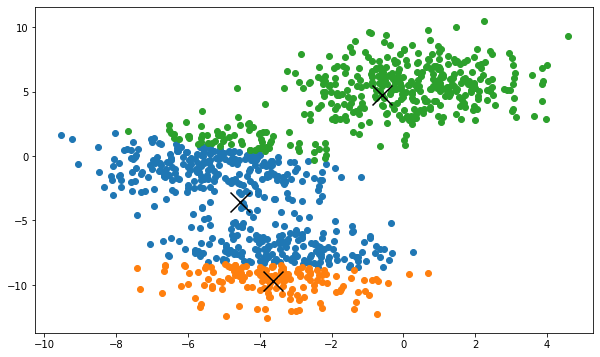

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
for i in np.unique(y):
  ax.scatter(np.vstack(puntos_centroides[i])[:, 0], np.vstack(puntos_centroides[i])[:, 1])
  ax.scatter(centroides[i][0],centroides[i][1], marker='x', color='k', s=400)

In [ ]:
#actualizar los centroides

for centroide, datos_centroide in puntos_centroides.items():
  centroides[centroide] = np.average(np.vstack(datos_centroide), axis=0)


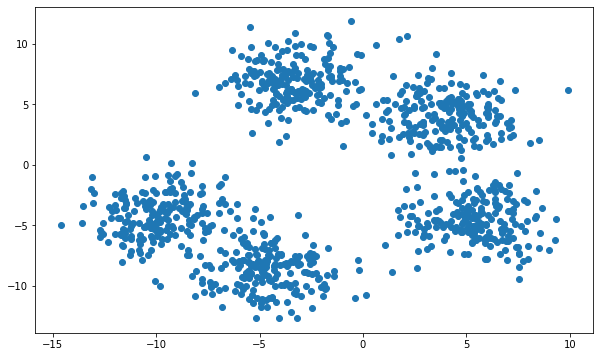

In [ ]:
X, y = make_blobs(n_samples=1000,
                  n_features=2,
                  cluster_std=2.5,
                  centers=5)
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.scatter(X[:, 0], X[:, 1])

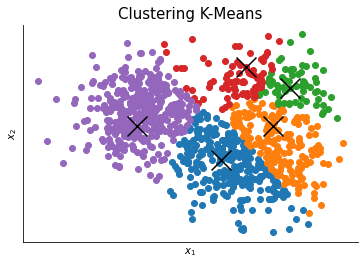

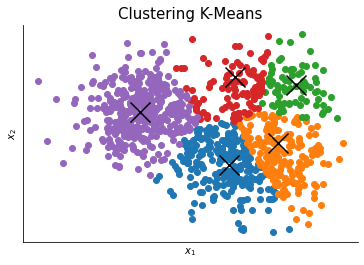

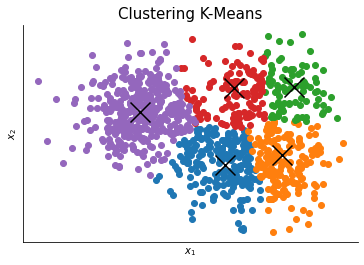

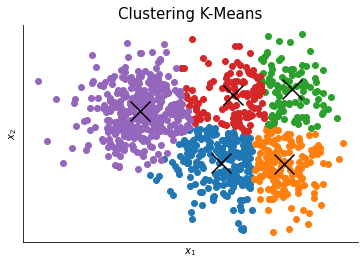

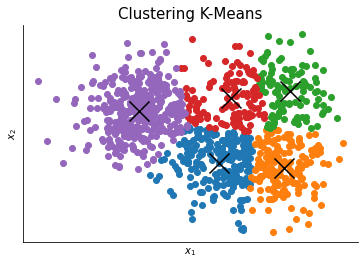

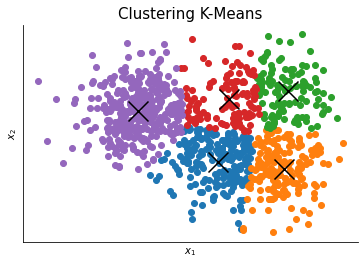

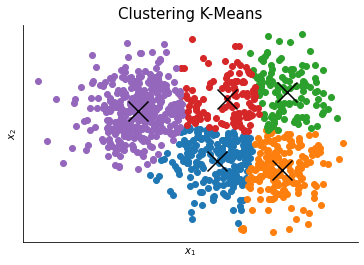

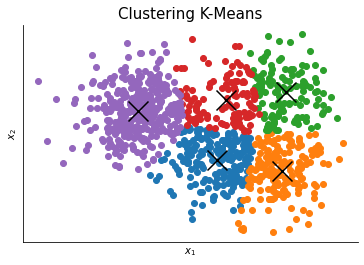

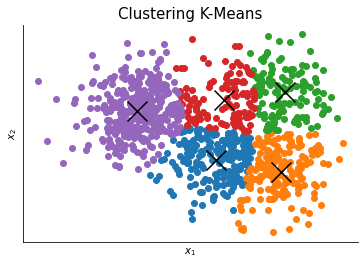

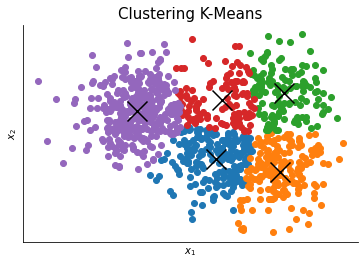

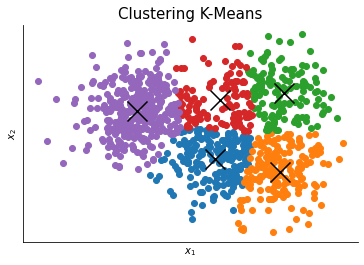

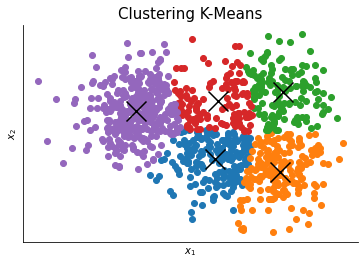

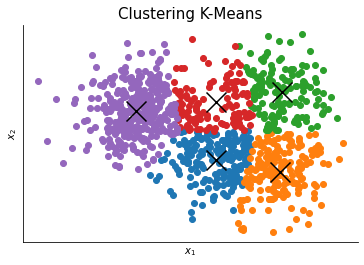

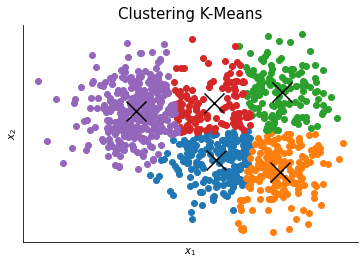

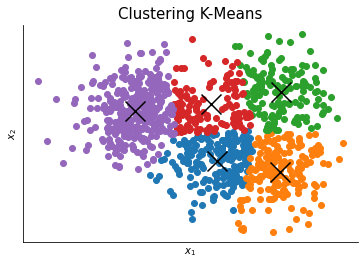

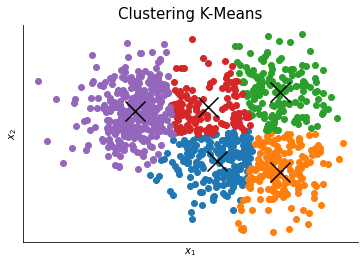

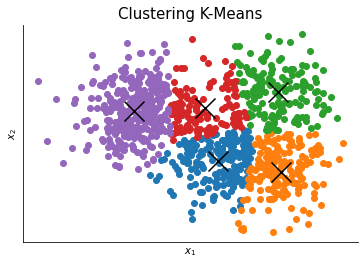

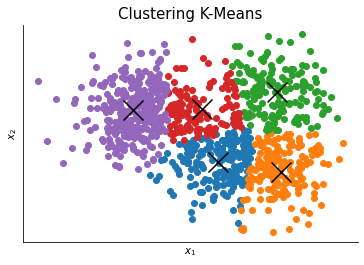

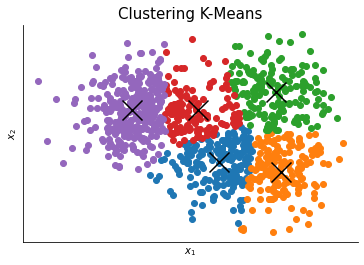

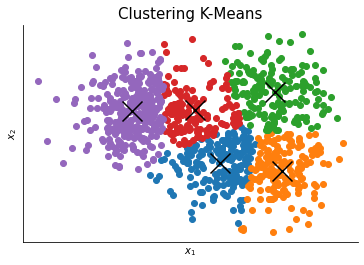

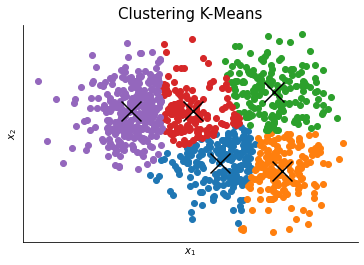

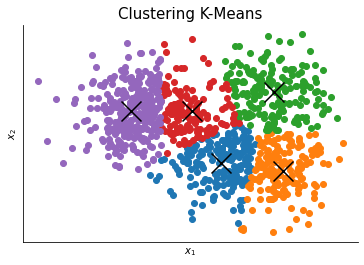

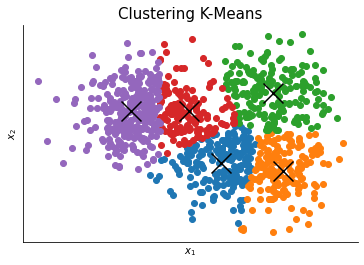

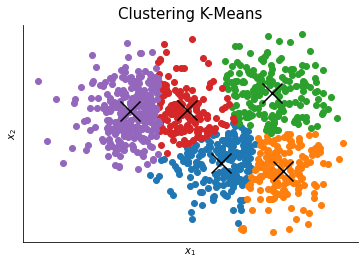

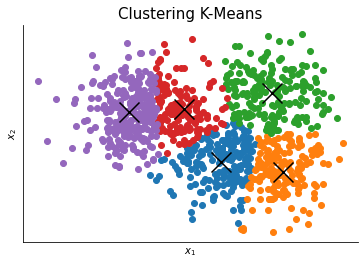

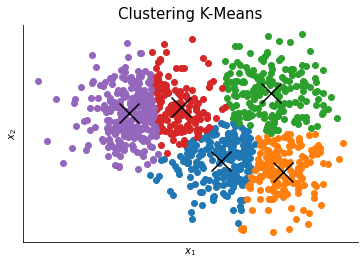

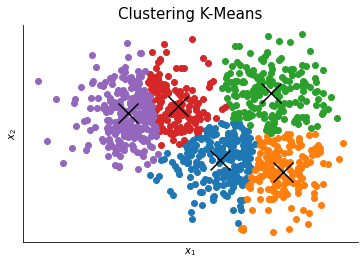

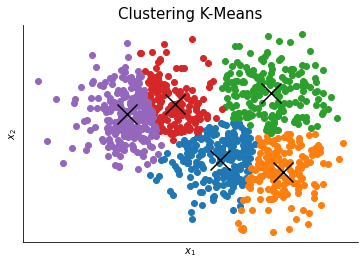

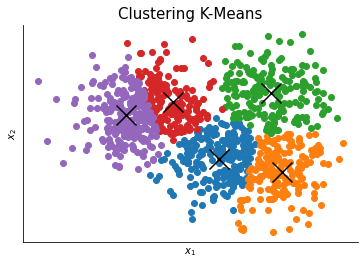

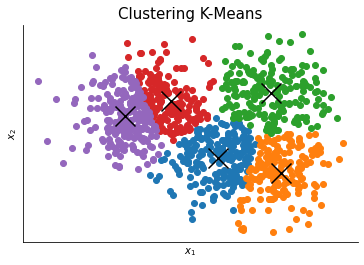

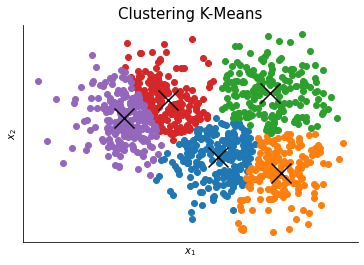

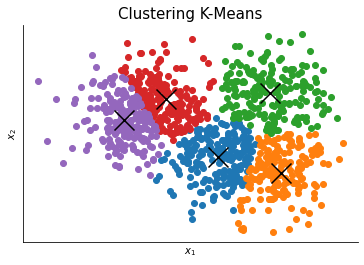

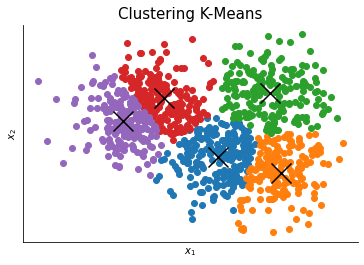

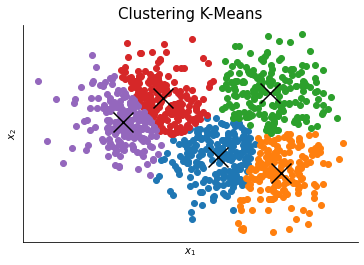

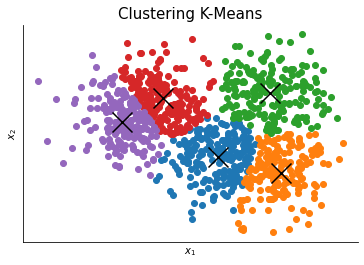

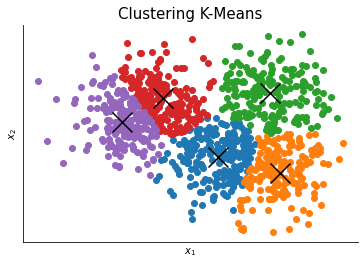

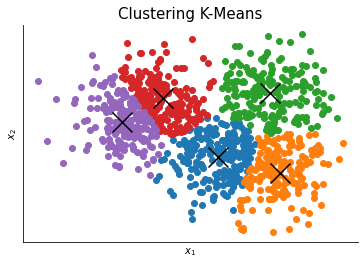

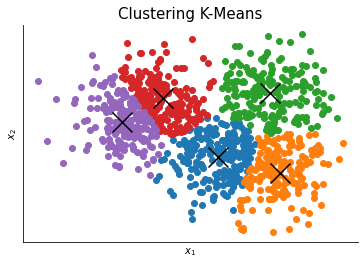

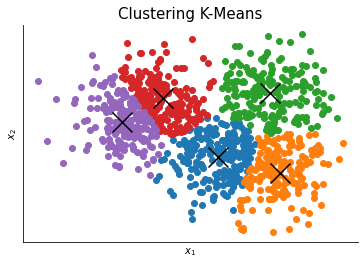

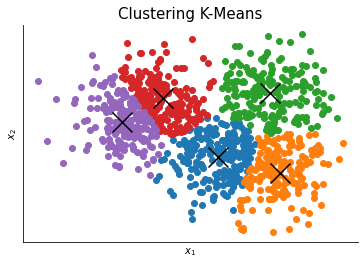

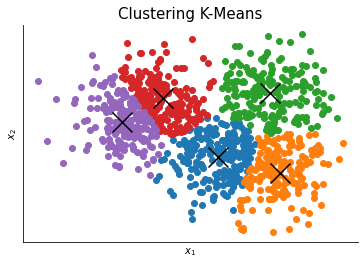

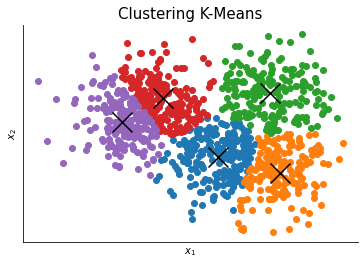

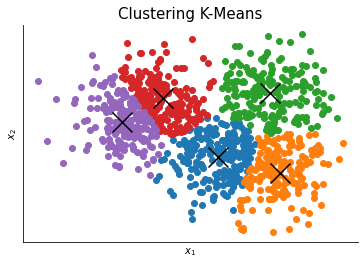

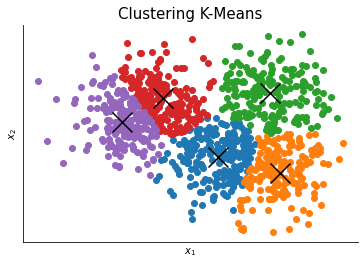

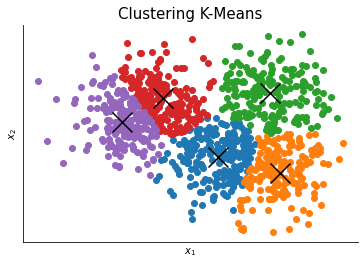

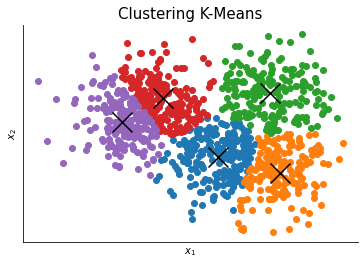

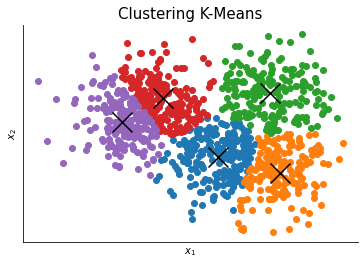

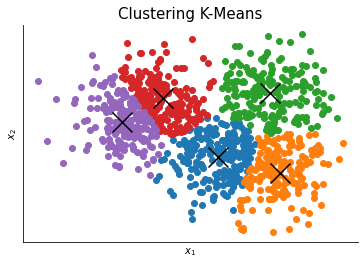

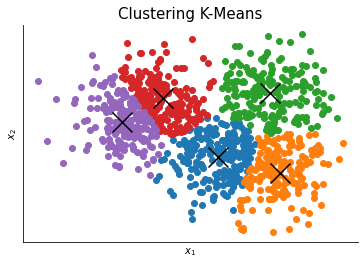

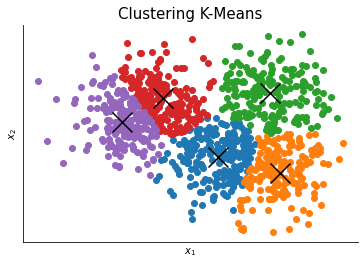

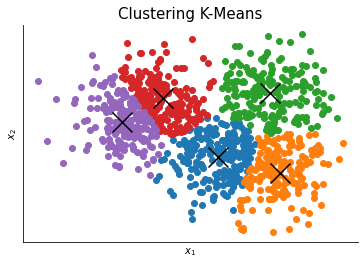

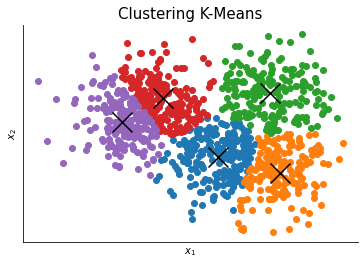

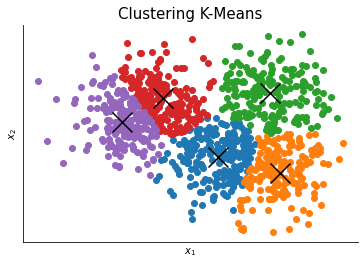

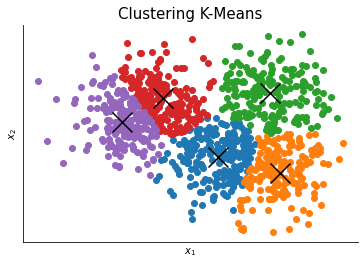

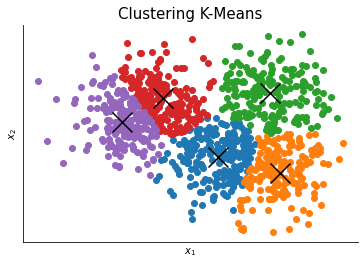

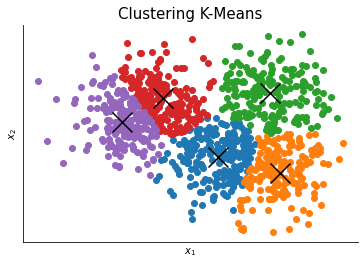

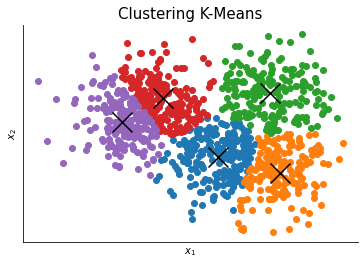

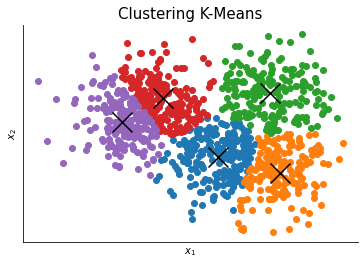

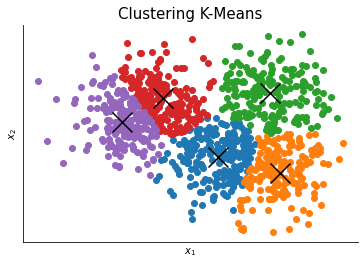

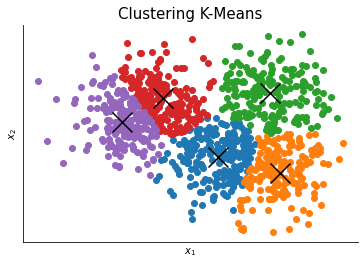

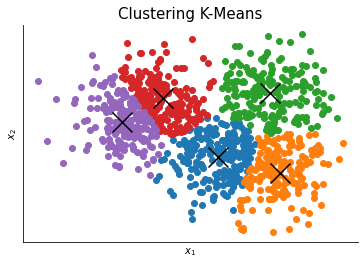

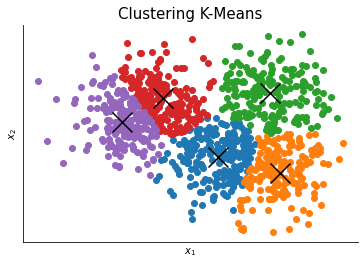

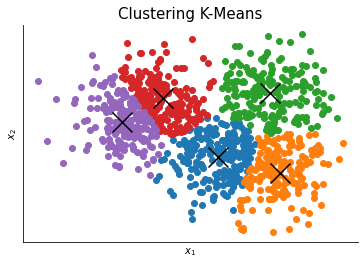

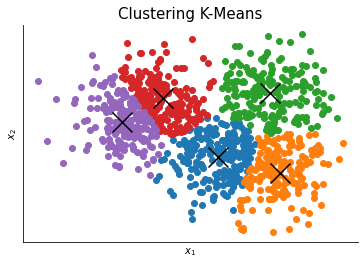

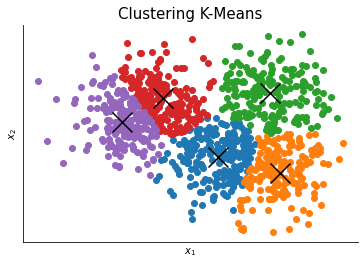

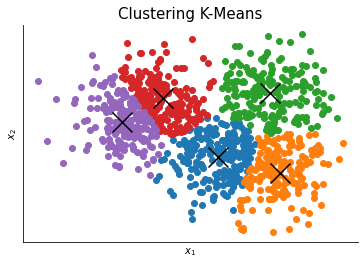

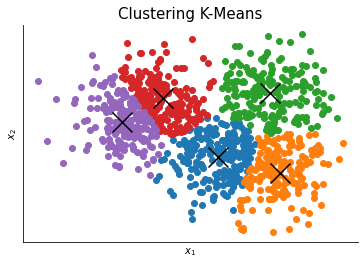

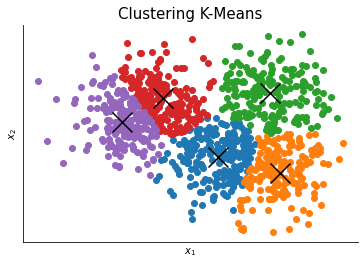

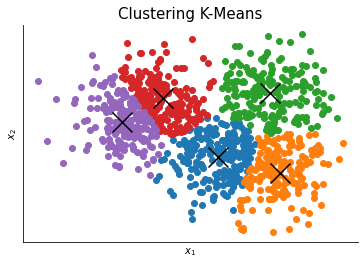

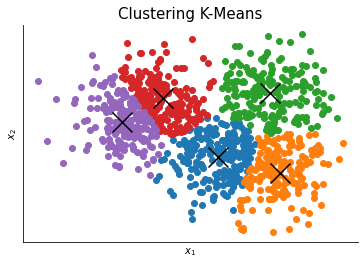

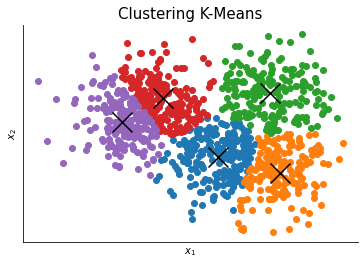

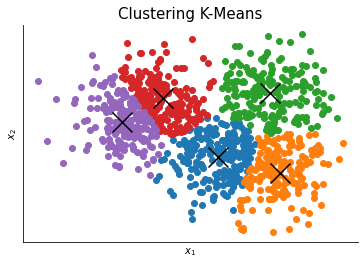

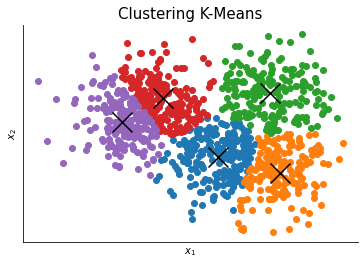

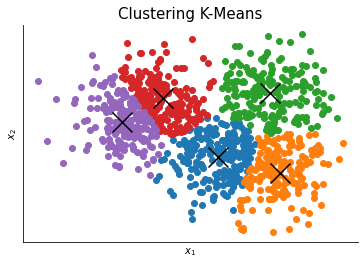

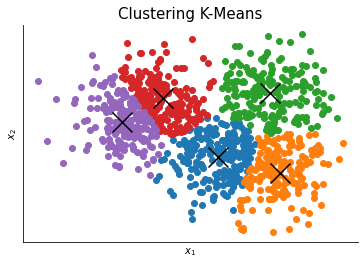

In [ ]:
k = 5
iteraciones = 75
#inicializar los centroides

centroides = {}
for i in range(k):
  centroides[i] = X[(np.random.choice(len(X)))]
contador = 1000
#calculo de las distancias
for itera in range(iteraciones):
  distancias = {}

  for pos, dato in enumerate(X):
    distancias[pos] = []
    for _, centroide in centroides.items():
      distancias[pos].append(dist_euclidiana(dato, centroide))

  #asignar los datos al centroide con el cual se tiene la mínima distancia

  puntos_centroide = {}

  for i in range(k):
    puntos_centroide[i] = []

  for pos_dato, dists in distancias.items():
    puntos_centroide[dists.index(min(dists))].append(X[pos_dato])

  fig, ax = plt.subplots(1, 1)
  for centroide, datos_centroide in puntos_centroide.items():
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='both',
                   which='both',
                   bottom=False,
                   top=False,
                   right=False,
                   left=False,
                   labelbottom=False,
                   labelleft=False)
    ax.set_title('Clustering K-Means', size=15)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.scatter(np.vstack(datos_centroide)[:, 0], np.vstack(datos_centroide)[:, 1])
    ax.scatter(centroides[centroide][0], centroides[centroide][1], marker='x', s=400, color='k')
  fig.savefig(f'image{contador}.png')
  plt.show()
  contador += 1

  #recalcular los centroides

  for centroide, datos_centroide in puntos_centroide.items():
    centroides[centroide] = np.average(np.vstack(datos_centroide), axis=0)




In [ ]:
import os
import re

In [ ]:
re.findall('\w+\.png', os.listdir()[4])

['image1070.png']

In [ ]:
imgs = [re.findall('\w+\.png', i)[0] for i in os.listdir() if len(re.findall('\w+\.png', i))>0 ]

In [ ]:
imgs.sort()

In [ ]:
imgs = imgs[:50]

In [ ]:
import imageio
with imageio.get_writer('my_gif.gif', mode='I', fps=8000) as writer:
  for filename in imgs:
    image = imageio.imread(filename)
    writer.append_data(image)